In [2]:
# MAIN RESEARCH QUESTION
# Are food banks effective in reducing food poverty in the UK? What else can be done to reduce it?

# FURTHER QUESTIONS:
# 1) What can be observed from the analysis of the Family Food datasets?

# 2) How does food bank usage correlate with region, income,
# demographic?

# 3) What factors lead to the likelihood of reliance on food banks?

# 4) How can changes in policies impact the reduction of food poverty?

# 5) What are the projected long term trends in operations of food banks and of
# food poverty?


# What are we trying to do in this exploratory analysis?
# We are trying to identify eating habits, dietary requirements and
# costs related to food poverty and the usage of food banks
# Additional datasets required: food bank usage stats (??)

# DATASETS:
# ORIGINAL                      MODIFIED
# UKHHcons-14Sept2023.ods   --  "household_purchases_mod.csv"

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Read the dataset and store it into a dataframe

df_qtyPurchase = pd.read_csv("household_purchases_mod.csv", thousands=',', low_memory=False)

In [5]:
df_qtyPurchase.head()

,Code,Group,Food,Units,1974,1975,1976,1977,1978,1979,...,2014,2015,201516,201617,201718,201819,201920,202021,202122,Unnamed: 53
0,1,Dairy,Milk and milk products excluding cheese,ml,2978.0,2987.0,2961.0,2855.0,2809.0,2765.0,...,1849,1827,1807,1818,1786,1840,1746,1791,1635,NaN
1,1,Dairy,Cheese,g,105.0,107.0,107.0,108.0,105.0,109.0,...,111,112,115,124,125,123,129,150,135,NaN
2,2,Meat_Alt,Carcase meat,g,393.0,413.0,396.0,416.0,416.0,436.0,...,195,187,192,175,182,168,170,193,146,NaN
3,2,Meat_Alt,Non-carcase meat and meat products,g,630.0,642.0,656.0,695.0,705.0,724.0,...,760,742,745,778,775,794,779,784,708,NaN
4,2,Meat_Alt,Fish,g,123.0,128.0,131.0,118.0,122.0,129.0,...,144,146,144,139,139,146,148,153,135,NaN


In [6]:
df_qtyPurchase.shape

(19, 54)

In [7]:
df_qtyPurchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         19 non-null     int64  
 1   Group        19 non-null     object 
 2   Food         19 non-null     object 
 3   Units        19 non-null     object 
 4   1974         16 non-null     float64
 5   1975         16 non-null     float64
 6   1976         16 non-null     float64
 7   1977         16 non-null     float64
 8   1978         16 non-null     float64
 9   1979         16 non-null     float64
 10  1980         16 non-null     float64
 11  1981         16 non-null     float64
 12  1982         16 non-null     float64
 13  1983         16 non-null     float64
 14  1984         16 non-null     float64
 15  1985         16 non-null     float64
 16  1986         16 non-null     float64
 17  1987         16 non-null     float64
 18  1988         16 non-null     float64
 19  1989      

In [8]:
df_qtyPurchase.columns

Index(['Code', 'Group', 'Food', 'Units', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001-02', '2002-03', '2003-04',
       '2004-05', '2005-06', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '201516', '201617', '201718', '201819',
       '201920', '202021', '202122', 'Unnamed: 53'],
      dtype='object')

In [9]:
summary_stats = df_qtyPurchase.loc[:, '1974':'202122'].describe()

print(summary_stats)

              1974         1975         1976         1977         1978  \
count    16.000000    16.000000    16.000000    16.000000    16.000000   
mean    664.562500   657.250000   644.812500   648.750000   656.312500   
std    1000.624403   992.891434   949.947733   957.661422   986.315887   
min       4.000000     4.000000     4.000000     4.000000     4.000000   
25%     152.250000   149.000000   152.000000   147.250000   145.250000   
50%     277.500000   266.000000   278.000000   273.500000   280.500000   
75%     558.750000   513.000000   536.750000   545.000000   537.000000   
max    3308.000000  3246.000000  3027.000000  3170.000000  3367.000000   

              1979         1980         1981         1982         1983  ...  \
count    16.000000    16.000000    16.000000    16.000000    16.000000  ...   
mean    656.875000   654.062500   651.375000   640.250000   635.062500  ...   
std     978.875673   976.186899   973.285219   954.653061   950.580347  ...   
min       4.00000

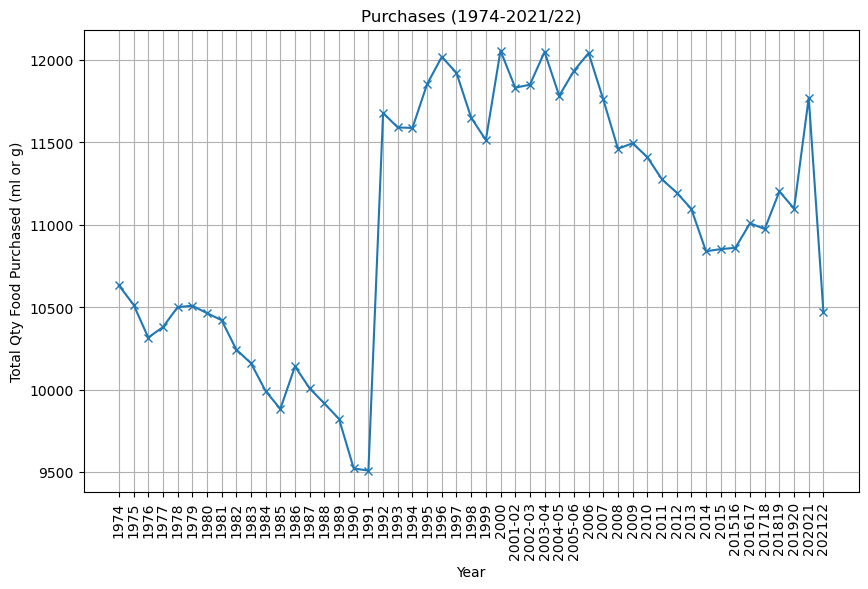

In [10]:
total_by_year = df_qtyPurchase.loc[:, '1974':'202122'].sum()

# Trends in purchases over the years
plt.figure(figsize = (10, 6))
plt.plot(total_by_year.index, total_by_year.values, marker = 'x', linestyle = '-')
plt.xticks(rotation = 'vertical')
plt.xlabel('Year')
plt.ylabel('Total Qty Food Purchased (ml or g)')
plt.title('Purchases (1974-2021/22)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

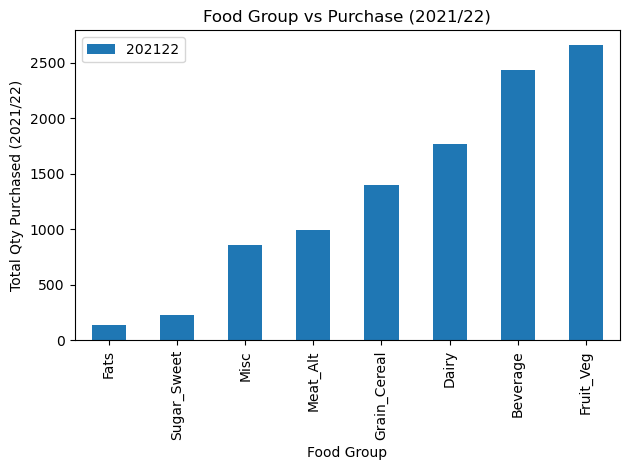

In [11]:
# Grouping by Food Group
gr = df_qtyPurchase.groupby('Group')['202122'].sum().reset_index()

# Bar chart for Food Group purchases in 2021/_22
plt.figure(figsize = (10, 6))
gr.sort_values(by = "202122").plot(x='Group', y='202122', kind='bar')
plt.xticks(rotation = 'vertical')
plt.xlabel('Food Group')
plt.ylabel('Total Qty Purchased (2021/22)')
plt.title('Food Group vs Purchase (2021/22)')
plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

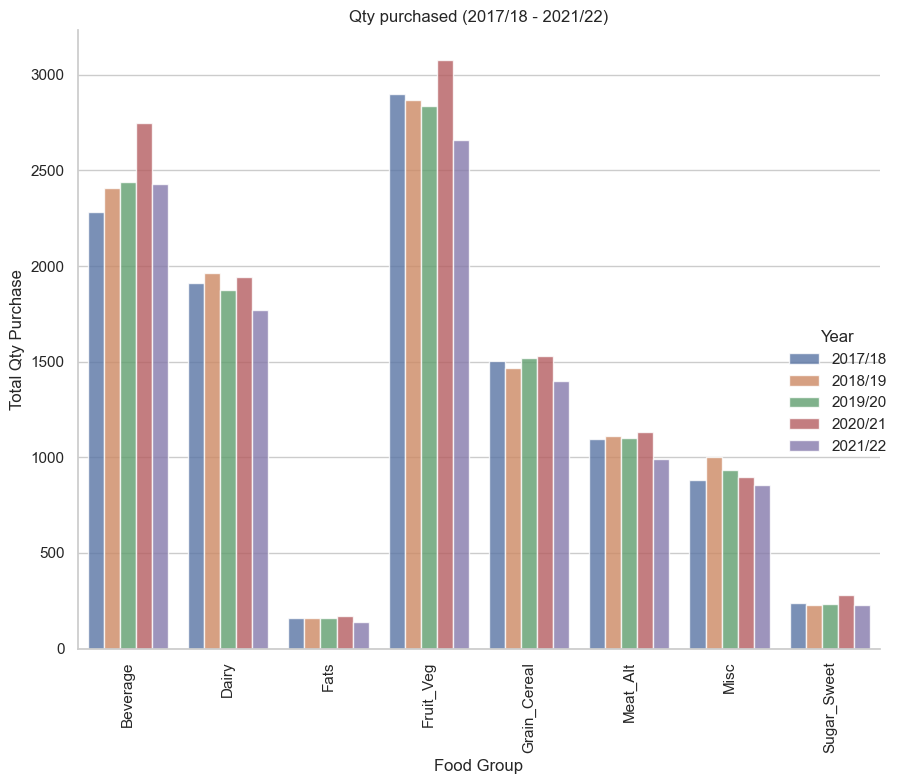

In [23]:
import seaborn as sns

yrs = ['201718','201819','201920','202021', '202122' ]
new_labels = ['2017/18','2018/19','2019/20','2020/21', '2021/22']
filt_df = df_qtyPurchase[['Group'] + yrs] 
filt_df = filt_df.groupby('Group').sum().reset_index()

gr_melt = filt_df.melt(id_vars=['Group'], var_name='Year', value_name='Quantity')

plt.figure(figsize=(18, 12))
gr_melt['Quantity'] = pd.to_numeric(gr_melt['Quantity'])

sns.set_theme(style="whitegrid")

g = sns.catplot(x = 'Group', y = 'Quantity', hue = 'Year', data = gr_melt, kind = 'bar', alpha=.8, height=8)
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.xticks(rotation = 'vertical')
plt.xlabel('Food Group')

plt.ylabel('Total Qty Purchase')
plt.title('Qty purchased (2017/18 - 2021/22)')
plt.tight_layout()
plt.show()